In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()
model=ChatOpenAI()

In [13]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    score: int

In [14]:
def create_outline_func(state: BlogState)-> BlogState:
    title=state['title']
    prompt=f'Generate a detailed outline for a blog on the topic - {title}'
    outline= model.invoke(prompt).content
    state['outline']=outline
    return state

In [15]:
def create_blog_func(state:BlogState)->BlogState:
    title=state['title']
    outline=state['outline']

    prompt=f'Write a detailed blog on the title - {title} using the following outline \n {outline}'
    content=model.invoke(prompt).content
    state['content']=content
    return state

In [24]:
def generate_score_func(state:BlogState)-> BlogState:
    title=state['title']
    outline=state['outline']
    content=state['content']
    prompt=f'Generate a score between 0 to 10 for the blog content {content}. Explanation or justification for the score is not required'
    score=model.invoke(prompt).content
    state['score']=score
    return state

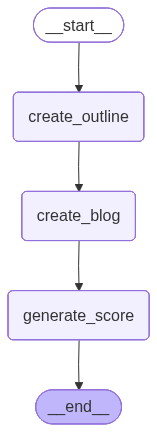

In [26]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline_func)
graph.add_node('create_blog',create_blog_func)
graph.add_node('generate_score',generate_score_func)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog', 'generate_score')
graph.add_edge('generate_score', END)
workflow=graph.compile()
graph.compile()



In [27]:
initial_state={'title':'Rise of AI in India'}
final_state = workflow.invoke(initial_state)
print('Evaluated Score = ',final_state['score'])
print(final_state['content'])

Evaluated Score =  8
In recent years, the rise of Artificial Intelligence (AI) technology has been a game-changer in various industries around the world. India, with its rapidly growing technology sector, has also been witnessing a significant surge in AI adoption and innovation. From healthcare to finance, education to manufacturing, AI is revolutionizing the way businesses operate and people live their lives.

Definition of AI:
AI is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning, reasoning, problem-solving, perception, and language understanding. In simple terms, AI allows machines to learn from data, adapt to new inputs, and perform tasks that traditionally required human intelligence.

Historical background of AI in India:
The evolution of AI technology in India can be traced back to the early 2000s when research institutes and educational institutions started exploring the potential of AI. In recent years,